In [1]:
import pandas as pd
import numpy as np
#Importing the data
df = pd.read_csv("Penntable2.csv")

#print(df.head(10))
#turning it into a pivot table
dfa = df.pivot(
    columns="VariableCode",
    index="RegionCode",
    values="AggValue").reset_index()
print(dfa.head(10))

VariableCode RegionCode          avh        emp        hc      pl_c  \
0                   ABW          NaN   0.047391       NaN  0.857056   
1                   AGO          NaN  16.078331  1.474635  0.504948   
2                   AIA          NaN        NaN       NaN  0.946954   
3                   ALB          NaN   1.071064  2.958068  0.476154   
4                   ARE          NaN   5.739913  2.743402  0.810979   
5                   ARG  1638.440039  20.135071  3.065968  0.521541   
6                   ARM          NaN   0.926079  3.133220  0.338758   
7                   ATG          NaN        NaN       NaN  0.900009   
8                   AUS  1729.342063  12.619437  3.536047  1.101949   
9                   AUT  1612.692748   4.488482  3.369997  0.973428   

VariableCode        pop        rgdpna          rnna  
0              0.105845  3.090405e+03  1.828438e+04  
1             30.809787  2.255400e+05  1.360361e+06  
2              0.014731  2.120107e+02  2.361484e+03  
3 

In [2]:
#Selecting and renaming the relevant columns
dfa.columns = ["country", "avg_h_worked", "employment", "human_capital", "price_lvl", "population", "r_gdp", "capital_stk"]
print(dfa.head())

  country  avg_h_worked  employment  human_capital  price_lvl  population  \
0     ABW           NaN    0.047391            NaN   0.857056    0.105845   
1     AGO           NaN   16.078331       1.474635   0.504948   30.809787   
2     AIA           NaN         NaN            NaN   0.946954    0.014731   
3     ALB           NaN    1.071064       2.958068   0.476154    2.882740   
4     ARE           NaN    5.739913       2.743402   0.810979    9.630959   

           r_gdp   capital_stk  
0    3090.404785  1.828438e+04  
1  225540.046875  1.360361e+06  
2     212.010666  2.361484e+03  
3   36398.882812  2.227876e+05  
4  637294.250000  4.397732e+06  


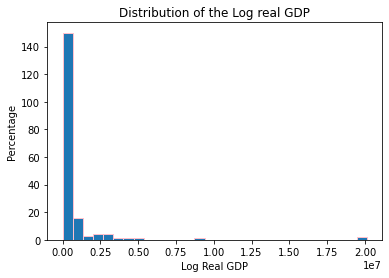

<Figure size 432x288 with 0 Axes>

In [3]:
from matplotlib import pyplot as plt

#Applying some descriptive statistics
plt.hist(dfa.r_gdp, bins = 30, edgecolor="pink")
plt.xlabel("Log Real GDP")
plt.ylabel("Percentage")
plt.title("Distribution of the Log real GDP")
plt.show()
plt.clf()

In [4]:
dfa["r_gdp_per_capita"] = dfa["r_gdp"]/dfa["population"]
print(dfa.head())

  country  avg_h_worked  employment  human_capital  price_lvl  population  \
0     ABW           NaN    0.047391            NaN   0.857056    0.105845   
1     AGO           NaN   16.078331       1.474635   0.504948   30.809787   
2     AIA           NaN         NaN            NaN   0.946954    0.014731   
3     ALB           NaN    1.071064       2.958068   0.476154    2.882740   
4     ARE           NaN    5.739913       2.743402   0.810979    9.630959   

           r_gdp   capital_stk  r_gdp_per_capita  
0    3090.404785  1.828438e+04      29197.456518  
1  225540.046875  1.360361e+06       7320.402665  
2     212.010666  2.361484e+03      14392.143500  
3   36398.882812  2.227876e+05      12626.488276  
4  637294.250000  4.397732e+06      66171.421766  


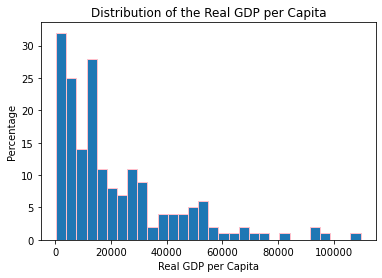

<Figure size 432x288 with 0 Axes>

In [5]:
plt.hist(dfa.r_gdp_per_capita, bins = 30, edgecolor="pink")
plt.xlabel("Real GDP per Capita")
plt.ylabel("Percentage")
plt.title("Distribution of the Real GDP per Capita")
plt.show()
plt.clf()

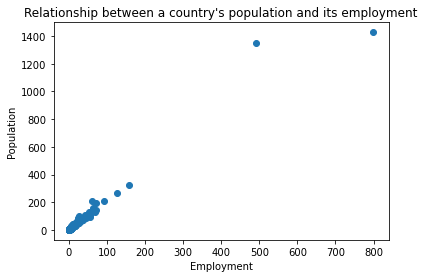

In [6]:
plt.scatter(dfa.employment, dfa.population)
plt.xlabel("Employment")
plt.ylabel("Population")
plt.title("Relationship between a country's population and its employment")
plt.show()

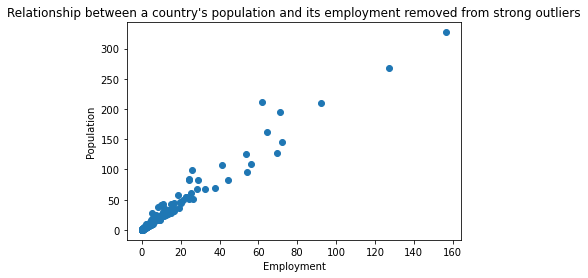

<Figure size 432x288 with 0 Axes>

In [7]:
x = dfa.employment
y = dfa.population
mask = y < 400
plt.scatter(x[mask], y[mask])
plt.xlabel("Employment")
plt.ylabel("Population")
plt.title("Relationship between a country's population and its employment removed from strong outliers")
plt.show()
plt.clf()

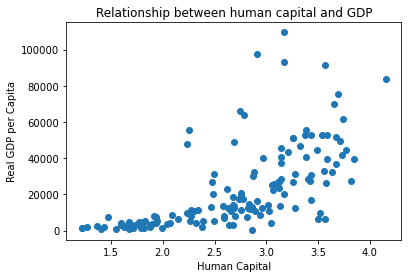

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(dfa.human_capital, dfa.r_gdp_per_capita)
plt.xlabel("Human Capital")
plt.ylabel("Real GDP per Capita")
plt.title("Relationship between human capital and GDP")
plt.show()
plt.clf()

In [9]:
#Obtaining a correlation table
dfa.corr()

,avg_h_worked,employment,human_capital,price_lvl,population,r_gdp,capital_stk,r_gdp_per_capita
avg_h_worked,1.000000,0.227293,-0.538129,-0.686375,0.238085,0.071200,0.056423,-0.530554
employment,0.227293,1.000000,-0.025766,-0.013055,0.977477,0.807485,0.844034,-0.049558
human_capital,-0.538129,-0.025766,1.000000,0.127643,-0.055010,0.172607,0.187345,0.646081
price_lvl,-0.686375,-0.013055,0.127643,1.000000,-0.021113,0.002867,0.007430,0.068198
population,0.238085,0.977477,-0.055010,-0.021113,1.000000,0.768815,0.789694,-0.066934
r_gdp,0.071200,0.807485,0.172607,0.002867,0.768815,1.000000,0.980816,0.146649
capital_stk,0.056423,0.844034,0.187345,0.007430,0.789694,0.980816,1.000000,0.154105
r_gdp_per_capita,-0.530554,-0.049558,0.646081,0.068198,-0.066934,0.146649,0.154105,1.000000


In [10]:
#As well as a simple statistics table
dfa.describe()

,avg_h_worked,employment,human_capital,price_lvl,population,r_gdp,capital_stk,r_gdp_per_capita
count,66.000000,177.000000,145.000000,183.000000,183.000000,1.830000e+02,1.800000e+02,183.000000
mean,1854.065910,18.537249,2.685684,0.690354,40.985700,6.686735e+05,3.019157e+06,21485.174167
std,268.386971,72.308112,0.697928,1.329177,149.880413,2.275148e+06,9.659192e+06,21239.250728
min,1381.929451,0.002539,1.218444,0.185737,0.004993,7.534247e+01,1.204673e+03,355.279809
25%,1649.225893,0.926079,2.091023,0.385263,2.113802,2.413317e+04,8.067656e+04,5408.232832
50%,1810.624166,4.156445,2.756026,0.512198,8.891388,8.763708e+04,3.194053e+05,13897.316502
75%,2078.660675,12.086910,3.210359,0.750454,29.191561,4.136631e+05,1.744785e+06,30154.432645
max,2474.911893,799.306641,4.154454,18.207436,1427.647786,2.012858e+07,9.348803e+07,109624.882535


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#First regression

dfa = dfa.dropna()
print(len(dfa))
print(dfa.head())
X = dfa[["avg_h_worked", "employment", "human_capital", "price_lvl", "capital_stk"]]
Y = dfa["r_gdp"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.2, random_state = 1)

model = LinearRegression()
model.fit(x_train, y_train)
model.predict(x_test)
R2 = model.score(x_test, y_test)

print(pd.DataFrame({"Feature":x_train.columns.tolist(), "Coefficients":model.coef_}))

print(R2)

66
   country  avg_h_worked  employment  human_capital  price_lvl  population  \
5      ARG   1638.440039   20.135071       3.065968   0.521541   44.361150   
8      AUS   1729.342063   12.619437       3.536047   1.101949   24.898152   
9      AUT   1612.692748    4.488482       3.369997   0.973428    8.891388   
12     BEL   1583.263997    4.839400       3.142735   0.986078   11.482178   
15     BGD   2418.882693   64.341400       2.075102   0.358928  161.376708   

          r_gdp  capital_stk  r_gdp_per_capita  
5    997136.625   3372807.50      22477.700082  
8   1319492.875   5809769.00      52995.614895  
9    470054.500   2838835.75      52866.267899  
12   524948.125   3439589.75      45718.514815  
15   708383.000   2612955.25       4389.623563  
         Feature  Coefficients
0   avg_h_worked    -28.568370
1     employment   5345.522428
2  human_capital -31040.789411
3      price_lvl -90703.028069
4    capital_stk      0.196225
0.9399468988795163


In [12]:
#We should log-transform all the data with huge numbers
dfa["log_emp"] = np.log(dfa.employment)
dfa["log_pop"] = np.log(dfa.population)
dfa["log_rgdp"] = np.log(dfa.r_gdp)
dfa["log_cap"] = np.log(dfa.capital_stk)
dfa["log_rgdp_p_cpt"] = np.log(dfa.r_gdp_per_capita)

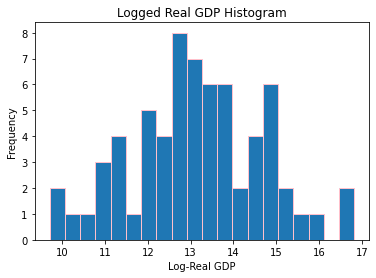

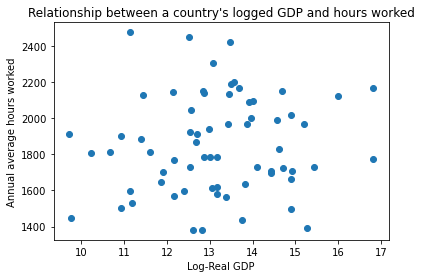

In [13]:
#Descriptive statistics on the logged data:

plt.hist(dfa.log_rgdp, bins = 20, edgecolor = "pink")
plt.xlabel("Log-Real GDP")
plt.ylabel("Frequency")
plt.title("Logged Real GDP Histogram")
plt.show()
plt.clf
plt.scatter(dfa.log_rgdp, dfa.avg_h_worked)
plt.xlabel("Log-Real GDP")
plt.ylabel("Annual average hours worked")
plt.title("Relationship between a country's logged GDP and hours worked")
plt.show()

In [14]:
#Did log-transforming the data improve the fit of the model?

dfa = dfa.dropna()
print(len(dfa))
print(dfa.head())
X = dfa[["avg_h_worked", "log_emp", "human_capital", "price_lvl", "log_cap"]]
Y = dfa["log_rgdp"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.2, random_state = 2)

model = LinearRegression()
model.fit(x_train, y_train)
model.predict(x_test)
R2 = model.score(x_test, y_test)
print(R2)

pd.DataFrame({"Feature":x_train.columns.tolist(), "Coefficients":model.coef_})

#Since the value of R2 rose, it was a good idea to log-transform the data

66
   country  avg_h_worked  employment  human_capital  price_lvl  population  \
5      ARG   1638.440039   20.135071       3.065968   0.521541   44.361150   
8      AUS   1729.342063   12.619437       3.536047   1.101949   24.898152   
9      AUT   1612.692748    4.488482       3.369997   0.973428    8.891388   
12     BEL   1583.263997    4.839400       3.142735   0.986078   11.482178   
15     BGD   2418.882693   64.341400       2.075102   0.358928  161.376708   

          r_gdp  capital_stk  r_gdp_per_capita   log_emp   log_pop   log_rgdp  \
5    997136.625   3372807.50      22477.700082  3.002463  3.792364  13.812643   
8   1319492.875   5809769.00      52995.614895  2.535238  3.214794  14.092758   
9    470054.500   2838835.75      52866.267899  1.501515  2.185083  13.060604   
12   524948.125   3439589.75      45718.514815  1.576791  2.440796  13.171055   
15   708383.000   2612955.25       4389.623563  4.164203  5.083741  13.470740   

      log_cap  log_rgdp_p_cpt  
5   15.03

,Feature,Coefficients
0,avg_h_worked,0.000217
1,log_emp,0.413200
2,human_capital,0.016543
3,price_lvl,0.679423
4,log_cap,0.650155


In [15]:
#Is population a better predictor than employment?

X = dfa[["avg_h_worked", "log_pop", "human_capital", "price_lvl", "log_cap"]]
Y = dfa["log_rgdp"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.2, random_state = 2)

model = LinearRegression()
model.fit(x_train, y_train)
model.predict(x_test)
R2 = model.score(x_test, y_test)
print(R2)

pd.DataFrame({"Feature":x_train.columns.tolist(), "Coefficients":model.coef_})

#A bigger R2 indicates that that is the case. Presumably, a bigger population, means more consumers AND more producers/workers.

0.9698423598084638


,Feature,Coefficients
0,avg_h_worked,0.000104
1,log_pop,0.511741
2,human_capital,0.148415
3,price_lvl,0.841146
4,log_cap,0.537404


In [16]:
#So far, we have worked towards predicting GDP. How about GDP per capita?
#Population is excluded as GDP per capita, in a way, already includes that measure
X = dfa[["avg_h_worked", "human_capital", "price_lvl", "log_cap"]]
Y = dfa["log_rgdp_p_cpt"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.2, random_state = 2)

model = LinearRegression()
model.fit(x_train, y_train)
model.predict(x_test)
R2 = model.score(x_test, y_test)
print(R2)

pd.DataFrame({"Feature":x_train.columns.tolist(), "Coefficients":model.coef_})

#The model performs better at predicting GDP rather than GDP per capita

0.7426426261746115


,Feature,Coefficients
0,avg_h_worked,-0.000298
1,human_capital,0.733604
2,price_lvl,1.102726
3,log_cap,0.014298
